<a href="https://colab.research.google.com/github/sgbharti22/ML-Lab-2023/blob/main/practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

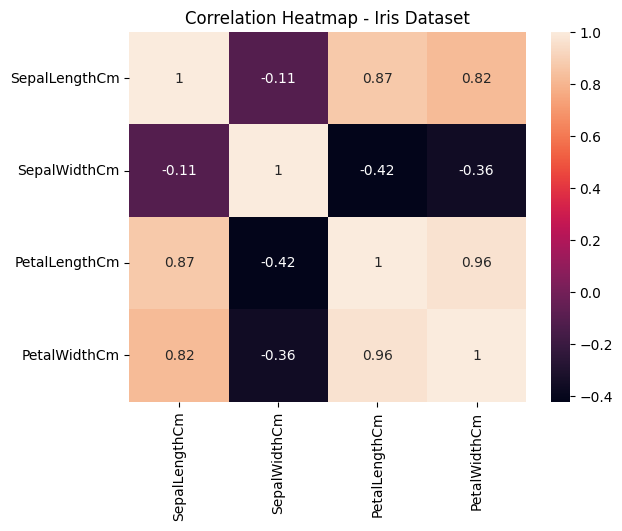

In [ ]:
# heat map
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")
dimensions = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
corr_matrix = df[dimensions].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap - Iris Dataset")
plt.show()

In [ ]:
# 3d plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_trisurf(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"])

ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")

plt.title("3D Surface Plot - Iris Dataset")
plt.show()

FileNotFoundError: ignored

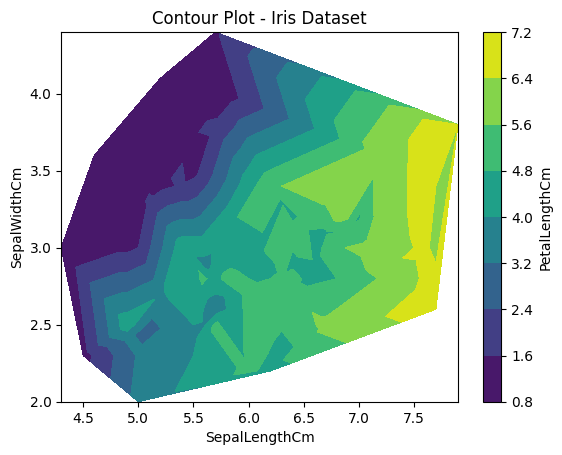

In [ ]:
# contour plot

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")

plt.figure()
plt.tricontourf(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"])

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.colorbar(label="PetalLengthCm")

plt.title("Contour Plot - Iris Dataset")
plt.show()


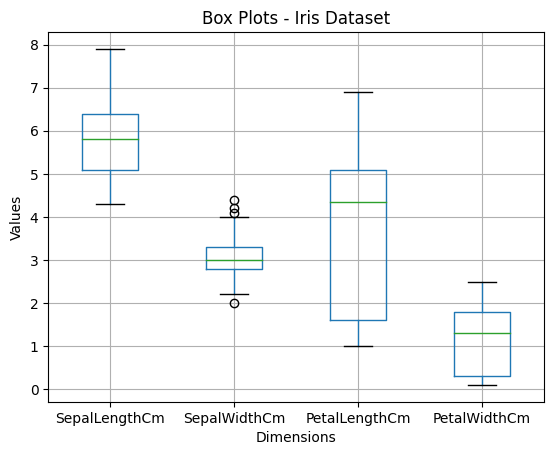

In [ ]:
# box plot

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")

dimensions = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
df[dimensions].boxplot()

plt.xlabel("Dimensions")
plt.ylabel("Values")
plt.title("Box Plots - Iris Dataset")
plt.show()

Single-linkage proximity matrix:
[[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]

Complete-linkage proximity matrix:
[[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]


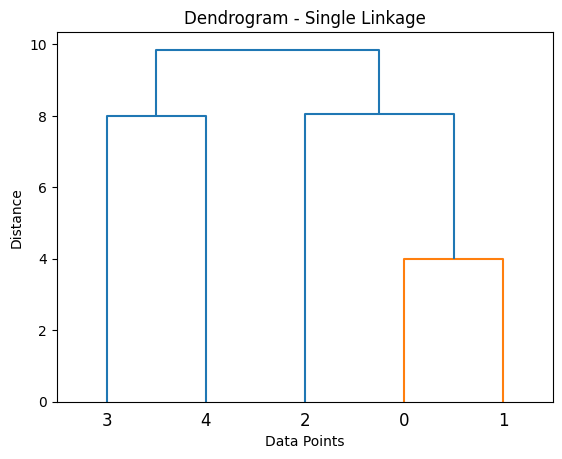

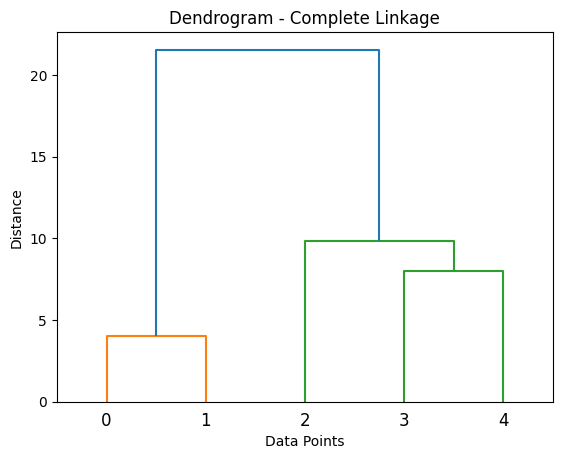

In [ ]:
#9
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

data = np.array([[4,4],
                 [8,4],
                 [15,8],
                 [24,4],
                 [24,12]])

single_linkage_matrix = single_linkage(data)
print("Single-linkage proximity matrix:")
print(single_linkage_matrix)

complete_linkage_matrix = complete_linkage(data)
print("\nComplete-linkage proximity matrix:")
print(complete_linkage_matrix)

linkage_matrix = linkage(data, method='single')
plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

linkage_matrix = linkage(data, method='complete')
plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [2]:
# BFS

from queue import PriorityQueue

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristic[start], start))

    while not pq.empty():
        val, node = pq.get()

        if node == goal:
            print("Goal reached!")
            return

        if node not in visited:
            print("Visiting node:", node)
            visited.add(node)

            for neighbor, val in graph[node]:
                if neighbor not in visited:
                    pq.put((heuristic[neighbor], neighbor))

    print("Goal not found!")

# Example graph representation using adjacency list
g = {
    'S': [('A', 0), ('B', 0)],
    'A': [('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'E': [('H', 0)],
    'F': [('I', 0), ('G', 0)],
    'G': [],
    'C': [],
    'D': [],
    'H': [],
    'I': []

}

start = 'S'
goal = 'I'

#Heuristic values from curr node -> goal node
h = {
    'A': 12,
    'B': 4,
    'C': 7,
    'D': 3,
    'E': 8,
    'F': 2,
    'H': 4,
    'I': 9,
    'G': 0,
    'S': 13
}

best_first_search(g, start, goal, h)

Visiting node: S
Visiting node: B
Visiting node: F
Visiting node: G
Visiting node: E
Visiting node: H
Visiting node: I
Visiting node: A
Visiting node: D
Visiting node: C
Goal not found!


In [ ]:
from queue import PriorityQueue

def a_star_search(graph, start, goal, heuristic):
    visited = set()  # Set to track visited nodes
    queue = PriorityQueue()  # Priority queue to store nodes to be explored
    queue.put((0, start))  # Priority queue with (priority, node) tuple
    costs = {start: 0}  # Dictionary to store the cost from the start node to each node
    parent = {start: None}  # Dictionary to store the parent node for each node

    while not queue.empty():
        cost, current_node = queue.get()

        if current_node == goal:
            # Goal reached, construct the path
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return path

        visited.add(current_node)

        for neighbor in graph[current_node]:
            # Calculate the cost from the start node to the neighbor
            neighbor_cost = costs[current_node] + graph[current_node][neighbor]

            if neighbor not in visited and (neighbor not in costs or neighbor_cost < costs[neighbor]):
                # Update the cost and priority for the neighbor
                costs[neighbor] = neighbor_cost
                priority = neighbor_cost + heuristic[neighbor]
                queue.put((priority, neighbor))
                parent[neighbor] = current_node

    # No path found
    return None


# Example usage
graph = {
    'A': {'B': 5, 'C': 3},
    'B': {'D': 2, 'E': 4},
    'C': {'F': 6},
    'D': {},
    'E': {'G': 1},
    'F': {},
    'G': {}
}

heuristic = {
    'A': 10,
    'B': 8,
    'C': 7,
    'D': 6,
    'E': 4,
    'F': 3,
    'G': 0
}

start_node = 'A'
goal_node = 'D'

path = a_star_search(graph, start_node, goal_node, heuristic)

if path is None:
    print("No path found.")
else:
    print("Path found:", path)


Path found: ['A', 'B', 'D']


In [ ]:
class Tree:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

# game_tree = Tree(0, [Tree(0, [Tree(3), Tree(12)]), Tree(0, [Tree(8), Tree(2)])])
# game_tree = Tree(0, [Tree(0, [Tree(0, [Tree(5),Tree(7)]), Tree(6)]), Tree(0, [Tree(9), Tree(3)])])
# game_tree=Tree(12,[Tree(5),Tree(4)])
# game_tree = Tree(4, [Tree(3, [Tree(1, [Tree(5),Tree(7)]), Tree(6)]), Tree(2, [Tree(9), Tree(3)])])
game_tree=Tree(12,[Tree(9),Tree(22)])

def minimax(node, depth, maximizing_player):
    if depth == 0 or not node.children:
        return node.value, [node.value]

    if maximizing_player:
        max_value = float("-inf")
        max_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, False)
            if child_value > max_value:
                max_value = child_value
                max_path = [node.value] + child_path
        return max_value, max_path
    else:
        min_value = float("inf")
        min_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, True)
            if child_value < min_value:
                min_value = child_value
                min_path = [node.value] + child_path
        return min_value, min_path


# Example usage:
optimal_value, optimal_path = minimax(game_tree, 8, True)
print("Optimal value:", optimal_value)
print("Optimal path:", optimal_path)

Optimal value: 22
Optimal path: [12, 22]


In [ ]:
#min-max
class T:
  def __init__(self,val,child=[]):
    self.val=val
    self.child=child

def minmax(node,depth,player):
  if depth==0 or not node.child:
    return node.val,[node.val]

  if player:
    max_val=float("-inf")
    max_path=[]
    for i in node.child:
      child_val,child_path=minmax(i,depth-1,False)
      if child_val>max_val:
        max_val=child_val
        max_path=[node.val]+child_path
    return max_val,max_path
  else:
    min_val=float("inf")
    min_path=[]
    for i in node.child:
      child_val,child_path=minmax(i,depth-1,True)
      if child_val<min_val:
        min_val=child_val
        min_path=[node.val]+child_path
    return min_val,min_path

tree=T(12, [T(9) , T(22)])
tree = T(4, [T(3, [T(5, [T(1),T(2)]), T(6)]), T(2, [T(9), T(3)])])

opti_val,opti_path=minmax(tree,8,True)
print(opti_val)
print(opti_path)

3
[4, 2, 3]


In [5]:
class Tree:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children


# Define the game tree using the Tree data structure
# game_tree = Tree(0, [Tree(0, [Tree(3), Tree(12)]), Tree(0, [Tree(8), Tree(2)])])
# game_tree = Tree(4, [Tree(3, [Tree(1, [Tree(5),Tree(7)]), Tree(6)]), Tree(2, [Tree(9), Tree(3)])])
game_tree=Tree(1, [Tree(2, [Tree(3, [Tree(2), Tree(3)]),Tree(4, [Tree(5), Tree(9)])]), Tree(5, [Tree(6, [Tree(0), Tree(1)]),Tree(7, [Tree(7), Tree(5)])])])


def minimax(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or not node.children:
        return node.value, [node.value]

    if maximizing_player:
        max_value = float("-inf")
        max_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, alpha, beta, False)
            if child_value > max_value:
                max_value = child_value
                max_path = [node.value] + child_path
            alpha = max(alpha, max_value)
            if alpha >= beta:
                break
        return max_value, max_path
    else:
        min_value = float("inf")
        min_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, alpha, beta, True)
            if child_value < min_value:
                min_value = child_value
                min_path = [node.value] + child_path
            beta = min(beta, min_value)
            if alpha >= beta:
                break
        return min_value, min_path


# Example usage:
game_tree=Tree(1, [Tree(2, [Tree(3, [Tree(2), Tree(3)]),Tree(4, [Tree(5), Tree(9)])]), Tree(5, [Tree(6, [Tree(0), Tree(1)]),Tree(7, [Tree(7), Tree(5)])])])
optimal_value, optimal_path = minimax(game_tree, 8, float("-inf"), float("inf"), True)
print("Optimal value:", optimal_value)
print("Optimal path:", optimal_path)

Optimal value: 3
Optimal path: [1, 2, 3, 3]


In [ ]:

#Question 2b
#Write a program to implement the A* algorithm
import heapq

def a_star(graph, start, goal, heuristic):
    # Initialize the priority queue with the start node
    frontier = [(0 + heuristic[start], start)]
    # Initialize the cost dictionary with the start node
    cost = {start: 0}
    # Initialize the parent dictionary with the start node
    parent = {start: None}
    # Initialize the explored set
    explored = set()

    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the lowest f-score
        (f_score, current_node) = heapq.heappop(frontier)

        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return (path, cost[goal])

        # Add the current node to the explored set
        explored.add(current_node)

        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Calculate the tentative g-score
            tentative_g_score = cost[current_node] + neighbor_cost
            # Check if the neighbor is already in the explored set
            if neighbor in explored:
                # If the tentative g-score is higher than the current g-score, skip this neighbor
                if tentative_g_score >= cost.get(neighbor, float('inf')):
                    continue

            # Check if the neighbor is not in the frontier or the tentative g-score is lower than the current g-score
            if neighbor not in [node[1] for node in frontier] or tentative_g_score < cost.get(neighbor, float('inf')):
                # Update the cost and parent dictionaries
                cost[neighbor] = tentative_g_score
                parent[neighbor] = current_node
                # Add the neighbor to the frontier with its priority being its f-score
                heapq.heappush(frontier, (tentative_g_score + heuristic[neighbor], neighbor))

    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    # 'A': [('B', 5), ('C', 6)],
    # 'B': [('D', 4), ('E', 7)],
    # 'C': [('F', 9), ('G', 8)],
    # 'D': [('H', 3)],
    # 'E': [('I', 6)],
    # 'F': [('J', 5)],
    # 'G': [('K', 7)],
    # 'H': [('L', 1)],
    # 'I': [('M', 2)],
    # 'J': [('N', 3)],
    # 'K': [('O', 4)],
    # 'L': [],
    # 'M': [],
    # 'N': [],
    # 'O': [('P', 1)],
    # 'P': []

    'A': [('B', 2), ('C', 1)],
    'S': [('A', 1), ('G', 10)],
    'B': [('D',5)],
    'C': [('D',3)],
    'D': [('G',2)],
    'G': []

}

# Heuristic function
heuristic = {
    # 'A': 10,
    # 'B': 8,
    # 'C': 7,
    # 'D': 6,
    # 'E': 8,
    # 'F': 3,
    # 'G': 2,
    # 'H': 5,
    # 'I': 6,
    # 'J': 3,
    # 'K': 2,
    # 'L': 1,
    # 'M': 4,
    # 'N': 2,
    # 'O': 4,
    # 'P': 0

    'A': 3,
    'B': 4,
    'C': 3,
    'D': 6,
    'G': 0,
    'S': 5,
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = a_star(graph, start, goal,heuristic)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")

Enter the start node: A
Enter the goal node: G
The minimum cost from A to G is (['A', 'C', 'D', 'G'], 6).


In [ ]:
# titanic naive bayes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
dataset=pd.read_csv('Titanic-Dataset.csv')

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dataset=dataset.drop(columns=["PassengerId","Name","Ticket","Cabin","Fare"],axis=1)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)

In [ ]:
dataset["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
dataset["Embarked"].fillna('S',inplace=True)

In [ ]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
dataset.replace({'Sex':{'male' : 0 ,'female': 1}},inplace=True)
dataset.replace({'Embarked':{'S' : 0 ,'C': 1, 'Q' : 2}},inplace=True)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))

    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[1:]
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

[[126  36]
 [ 21  85]]
0.7822163294983107


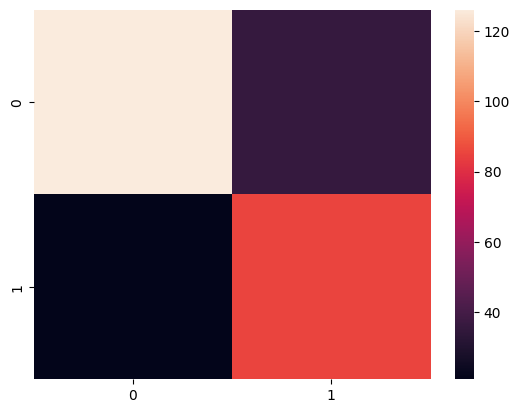

In [ ]:
train, test = train_test_split(dataset, test_size=.3, random_state=41)

X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Survived")

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='macro'))

sns.heatmap(confusion_matrix(Y_test, Y_pred));

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       162
           1       0.70      0.80      0.75       106

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268



Single-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.0676375  148.07305629
  149.05750568]
 [  1.13578167   0.           1.04403065 ... 146.06929862 147.0756948
  148.05826556]
 [  2.06397674   1.04403065   0.         ... 145.07491168 146.08049151
  147.06284371]
 ...
 [147.0676375  146.06929862 145.07491168 ...   0.           1.17473401
    2.1       ]
 [148.07305629 147.0756948  146.08049151 ...   1.17473401   0.
    1.26095202]
 [149.05750568 148.05826556 147.06284371 ...   2.1          1.26095202
    0.        ]]

Complete-linkage proximity matrix:

[[  0.           1.13578167   2.06397674 ... 147.0676375  148.07305629
  149.05750568]
 [  1.13578167   0.           1.04403065 ... 146.06929862 147.0756948
  148.05826556]
 [  2.06397674   1.04403065   0.         ... 145.07491168 146.08049151
  147.06284371]
 ...
 [147.0676375  146.06929862 145.07491168 ...   0.           1.17473401
    2.1       ]
 [148.07305629 147.0756948  146.08049151 ...   1.17473401 

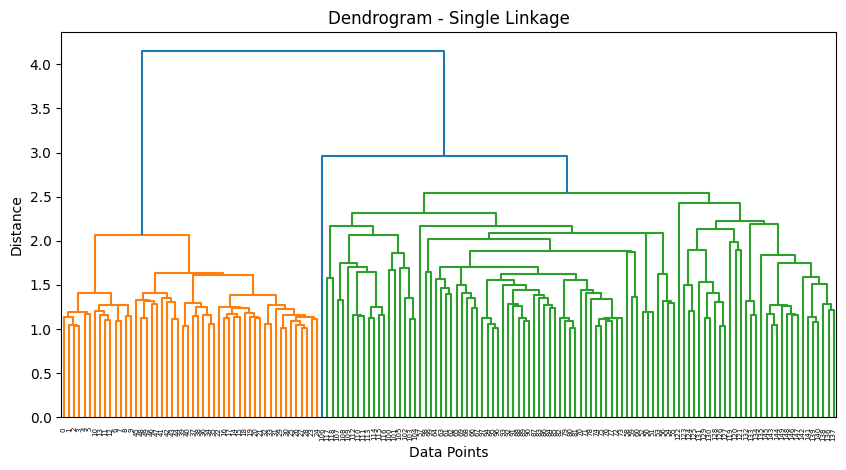

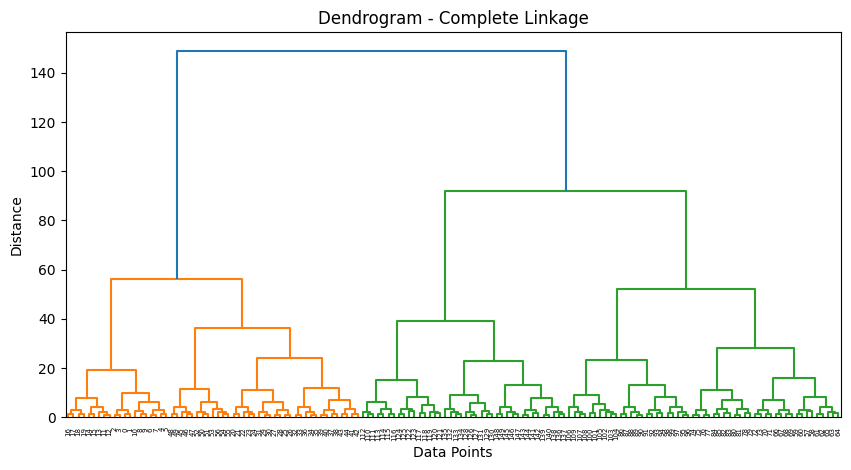

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
import pandas as pd
iris=pd.read_csv('Iris.csv')
iris=iris.drop(columns="Species",axis=1)
iris=iris.values
# iris = np.loadtxt('Iris.csv', delimiter=',', skiprows=1)

# Function to calculate the proximity matrix based on single-linkage
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Function to calculate the proximity matrix based on complete-linkage
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Calculate the proximity matrix using single-linkage
single_linkage_matrix = single_linkage(iris)
print("Single-linkage proximity matrix:\n")
print(single_linkage_matrix)

# Calculate the proximity matrix using complete-linkage
complete_linkage_matrix = complete_linkage(iris)
print("\nComplete-linkage proximity matrix:\n")
print(complete_linkage_matrix)

# Plot the dendrogram using single-linkage
linkage_matrix = linkage(iris, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram using complete-linkage
linkage_matrix = linkage(iris, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
def minkowski(Q, R, p):
    '''
    This function calculates the distance between 2 vectors
    p=1 will give Manhattan distance
    p=2 will give Euclidean distance
    '''
    distance = (np.sum(np.abs(Q - R) ** p) ** (1 / p))
    return distance

import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNearestNeighbors:
    def __init__(self, k=3, p_metric=2):
        self.k = k
        self.p_metric = p_metric

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_Pred):
        Y_Pred = [self.classify(x) for x in X_Pred]
        return np.array(Y_Pred)

    def classify(self, x):
        distances = [minkowski(x, x_train, self.p_metric) for x_train in self.X_train]
        idx_k = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[i] for i in idx_k]
        predicted_class = Counter(k_labels).most_common(1)[0][0]
        return predicted_class

# Load the Glass dataset
glass = pd.read_csv("glass (1).csv", skiprows=1)

# Remove the last column from X and keep only the last column for y
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of KNearestNeighbors with k=3 and p_metric=2
knn = KNearestNeighbors(k=3, p_metric=2)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6046511627906976


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Glass dataset
glass = pd.read_csv("glass (1).csv")
glass_X = glass.drop("Type", axis=1)
glass_y = glass["Type"]

# Define Euclidean distance metrics
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define KNN classifier
def KNN_classifier(X_train, y_train, X_test, k, distance_metric):
    y_pred = []
    for i in range(X_test.shape[0]):
        distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)
        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()
        nearest_labels = y_train.iloc[nearest_indices]
        label_counts = np.bincount(nearest_labels)
        predicted_label = np.argmax(label_counts)
        y_pred.append(predicted_label)
    return y_pred
def split_data(X, y, method):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        return X_train, X_test, y_train, y_test

# Run KNN classifier for Glass dataset
for method in ["70-30"]:
    print(f"Results for Glass dataset using {method} split and Euclidean distance:")
    X_train, X_test, y_train, y_test = split_data(glass_X, glass_y, method)
    for k in [3, 5, 7]:
        y_pred = KNN_classifier(X_train, y_train, X_test, k, euclidean_distance)
        print(f"k={k}: Accuracy = {accuracy_score(y_test, y_pred)}")
    print()

Results for Glass dataset using 70-30 split and Euclidean distance:
k=3: Accuracy = 0.6461538461538462
k=5: Accuracy = 0.5846153846153846
k=7: Accuracy = 0.5692307692307692



In [ ]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
df = pd.read_csv('glass (1).csv')

print(df.head())
X = df.drop('Type', axis=1).values
y = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
print(type(X_test))
print(list(y_test))
clf = KNN(k=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(predictions)
print("Accuracy:", accuracy)

predictions = clf.predict([[1.52101,13.64,	4.49,	1.1,	71.78,	0.06,	8.75,	0,	0]])

predictions = clf.predict([[1.51602,	14.85,	0,	2.38,	73.28,	0,	8.76,	0.64,	0.09]])

print("abs : ",predictions)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'numpy.ndarray'>
[1, 1, 1, 6, 2, 1, 3, 2, 2, 1, 1, 2, 1, 2, 5, 1, 1, 5, 5, 2, 1, 1, 6, 2, 1, 3, 2, 5, 2, 2, 7, 1, 2, 2, 3, 3, 1, 3, 1, 2, 1, 7, 2, 2, 2, 7, 7, 6, 1, 7, 2, 2, 1, 1, 2, 3, 3, 1, 1, 7, 2, 7, 5, 2, 2]
[2, 3, 1, 6, 1, 2, 1, 2, 2, 1, 1, 2, 1, 5, 5, 1, 1, 5, 5, 2, 2, 1, 7, 2, 1, 3, 1, 5, 2, 2, 7, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 7, 2, 1, 2, 7, 7, 2, 1, 7, 6, 3, 1, 1, 1, 1, 1, 3, 1, 7, 2, 1, 5, 2, 2]
Accuracy: 0.6615384615384615
abs :  [7]


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def manhattan_distance(x1, x2):
    distance = np.sum(np.abs(x1 - x2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

df = pd.read_csv('fruit.csv')
label_encoder = LabelEncoder()
df['fruit_name'] = label_encoder.fit_transform(df['fruit_name'])
df['fruit_subtype'] = df['fruit_subtype'].factorize()[0]

X = df.drop('fruit_name', axis=1).values
y = df['fruit_name'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(predictions)
print("Accuracy:", accuracy)

[2, 4, 6, 2, 3, 3, 6, 6, 6, 2, 3, 4]
Accuracy: 0.6666666666666666


In [ ]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
df = pd.read_csv('glass (1).csv')

print(df.head())
X = df.drop('Type', axis=1).values
y = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
print(type(X_test))
print("y-test : ",list(y_test))
clf = KNN(k=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print("y pred : ",predictions)
print("Accuracy:", accuracy)

predictions = clf.predict([[1.52101,13.64,	4.49,	1.1,	71.78,	0.06,	8.75,	0,	0]])

predictions = clf.predict([[1.51602,	14.85,	0,	2.38,	73.28,	0,	8.76,	0.64,	0.09]])

print("abs : ",predictions)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'numpy.ndarray'>
y-test :  [1, 1, 1, 6, 2, 1, 3, 2, 2, 1, 1, 2, 1, 2, 5, 1, 1, 5, 5, 2, 1, 1, 6, 2, 1, 3, 2, 5, 2, 2, 7, 1, 2, 2, 3, 3, 1, 3, 1, 2, 1, 7, 2, 2, 2, 7, 7, 6, 1, 7, 2, 2, 1, 1, 2, 3, 3, 1, 1, 7, 2, 7, 5, 2, 2]
y pred :  [2, 3, 1, 6, 1, 2, 1, 2, 2, 1, 1, 2, 1, 5, 5, 1, 1, 5, 5, 2, 2, 1, 7, 2, 1, 3, 1, 5, 2, 2, 7, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 7, 2, 1, 2, 7, 7, 2, 1, 7, 6, 3, 1, 1, 1, 1, 1, 3, 1, 7, 2, 1, 5, 2, 2]
Accuracy: 0.6615384615384615
abs :  [7]


In [ ]:
# knn glass dataset my

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def euclid(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
  def __init__(self,k):
    self.k=k

  def fit(self,X,Y):
    self.X_train=X
    self.Y_train=Y

  def predict(self,X):
    prediction=[self._prediction(i) for i in X]
    return prediction

  def _prediction(self,x):
    dist=[euclid(x,i) for i in self.X_train]
    k_indices=np.argsort(dist)[:self.k]
    k_nearest=[self.Y_train[i] for i in k_indices]
    most_commons=Counter(k_nearest).most_common()
    return most_commons[0][0]

df=pd.read_csv("glass (1).csv")
X=df.drop(columns="Type",axis=1).values
Y=df["Type"].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
clf=KNN(3)
clf.fit(X_train,Y_train)

Y_pred=list(clf.predict(X_test))

accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
print("Accuracy : ",accuracy)

print("Confusion matrix : ")
print(confusion_matrix(Y_test, Y_pred))
print("Classification Report : ")
print(classification_report(Y_test,Y_pred))

print("Entee the data for classification : ")
q=[1.52101,	13.64,	4.49,	1.1,	71.78,	0.06,	8.75,	0,	0] #1
q=[1.51602,	14.85,	0,	2.38,	73.28,	0,	8.76,	0.64,	0.09 ]  #7
predict=clf.predict([q])
print("Ans : ",predict)

Accuracy :  0.676923076923077
Confusion matrix : 
[[13  3  3  0  0  0]
 [ 5 14  0  0  3  1]
 [ 1  0  3  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  1  0  0  1  1]
 [ 0  0  0  0  1  9]]
Classification Report : 
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.70      0.61      0.65        23
           3       0.50      0.75      0.60         4
           5       1.00      0.67      0.80         6
           6       0.20      0.33      0.25         3
           7       0.82      0.90      0.86        10

    accuracy                           0.68        65
   macro avg       0.65      0.66      0.64        65
weighted avg       0.71      0.68      0.68        65

Entee the data for classification : 
Ans :  [2]


In [ ]:
# knn friut dataset my

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def euclid(x1, x2):
    distance = np.sum(np.abs(x1 - x2))
    return distance

class KNN:
  def __init__(self,k):
    self.k=k

  def fit(self,X,Y):
    self.X_train=X
    self.Y_train=Y

  def predict(self,X):
    prediction=[self._prediction(i) for i in X]
    return prediction

  def _prediction(self,x):
    dist=[euclid(x,i) for i in self.X_train]
    k_indices=np.argsort(dist)[:self.k]
    k_nearest=[self.Y_train[i] for i in k_indices]
    most_commons=Counter(k_nearest).most_common()
    return most_commons[0][0]



In [ ]:
df=pd.read_csv("fruit.csv")

df=df.drop(columns=["fruit_name","fruit_subtype"],axis=1)
print(df.head())

X=df.drop(columns="fruit_label",axis=1).values
Y=df["fruit_label"].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
clf=KNN(3)
clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)
print(list(Y_test))
print(Y_pred)

accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
print("Accuracy : ",accuracy)

print("Confusion matrix : ")
print(confusion_matrix(Y_test, Y_pred))
print("Classification Report : ")
print(classification_report(Y_test,Y_pred))

print("Enter the data for classification : ")
q=[1.52101,	13.64,	4.49,	1.1,	71.78,	0.06,	8.75,	0,	0] #1
q=[1.51602,	14.85,	0,	2.38,	73.28,	0,	8.76,	0.64,	0.09 ]  #7
# predict=clf.predict([q])
# print("Ans : ",predict)

   fruit_label  mass  width  height  color_score
0            1   192    8.4     7.3         0.55
1            1   180    8.0     6.8         0.59
2            1   176    7.4     7.2         0.60
3            2    86    6.2     4.7         0.80
4            2    84    6.0     4.6         0.79
[1, 2, 3, 1, 4, 4, 4, 3, 4, 1, 4, 2]
[4, 2, 3, 1, 3, 4, 3, 3, 4, 3, 4, 2]
Accuracy :  0.6666666666666666
Confusion matrix : 
[[1 0 1 1]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 2 3]]
Classification Report : 
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         2
           3       0.40      1.00      0.57         2
           4       0.75      0.60      0.67         5

    accuracy                           0.67        12
   macro avg       0.79      0.73      0.68        12
weighted avg       0.80      0.67      0.66        12

Enter the data for classification : 


labols: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Centroids: [[ 25.           5.00612245   3.42040816   1.46530612   0.24489796]
 [ 

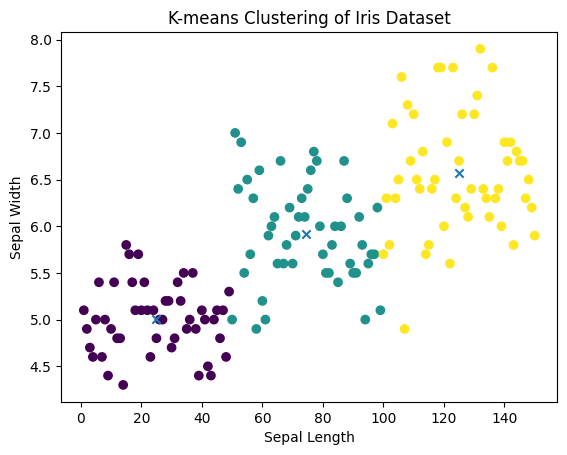

In [ ]:
# kmeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans(X, K, max_iters=100):
    centroids = X[:K]

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Load the Iris dataset
data = pd.read_csv('Iris.csv')

data.replace({'Species' : {"Iris-setosa" : 0,"Iris-virginica": 2,"Iris-versicolor":1}},inplace=True)

X = data.drop('Species', axis=1).values

# Perform K-means clustering
K = 3
labels, centroids = kmeans(X, K)

# Print the resulting labels and centroids
Y_actual=list(data["Species"])
Y_pred=list(labels)
print("labols:",list(data["Species"]))
print("Labels:", list(labels))
print("Centroids:", centroids)
cnt=0
for i in range(len(Y_actual)):
  if(Y_actual[i]==Y_pred[i]):
    cnt=cnt+1

print("Accuarcy : ",(cnt/len(Y_actual)))

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()